In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")

### Read Dataset

In [2]:
data = pd.read_csv('data.csv', sep='|')
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


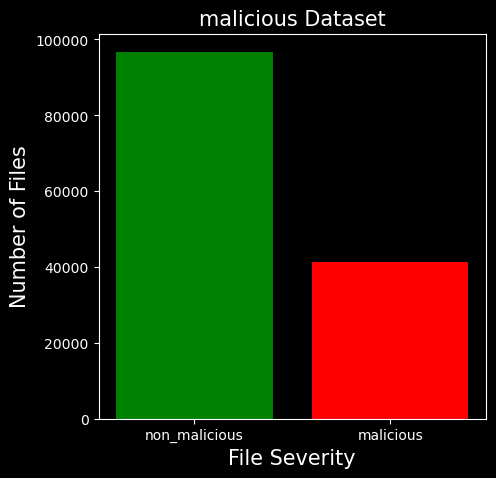

In [18]:
non_malicious=0
malicious=0

for i in data["legitimate"].values:
    if(i==0):
        non_malicious=non_malicious+1
    if(i==1):
        malicious=malicious+1

data1 = {'non_malicious':non_malicious,'malicious':malicious}
column = list(data1.keys())
rows = list(data1.values())

plt.style.use('dark_background')
fig = plt.figure(figsize = (5,5))
plt.bar(column, rows, color=['green', 'red'])
 
plt.xlabel("File Severity",fontsize=15)
plt.ylabel("Number of Files",fontsize=15)
plt.title("malicious Dataset",fontsize=15)
plt.show()

In [4]:
X = data.drop(['Name','md5','legitimate'],axis=1).values
y = data['legitimate'].values

### Building and Training Model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.3, shuffle=True)

### Neural Network

In [6]:
from keras.models import Sequential
#from keras.wrappers.scikit learn import KerasClassifier 
def trainModel (model, epochs, optimizer):
  batch_size=128 
  #callback myCallback() 
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics='accuracy') 
  return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

def plotValidate(history):
  print("Validation Accuracy",max(history.history["val_accuracy"]))
  plt.style.use('default')
  pd.DataFrame(history.history).plot(figsize=(5,5))
  plt.show()

In [7]:
import tensorflow as tf
from tensorflow import keras
model=keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'), 
    keras.layers.Dropout (0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),])
print(model.summary())
model_history=trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               28160     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [8]:
test_loss, test_acc=model.evaluate(X_test, y_test, batch_size=128) 
print("The test Loss is :", test_loss) 
print("\nThe Best test Accuracy is ", test_acc*100)

324/324 [==============================] - 1s 2ms/step - loss: 0.6112 - accuracy: 0.6996
The test Loss is : 0.6111814975738525

The Best test Accuracy is  69.96257305145264


Validation Accuracy 0.9613425135612488


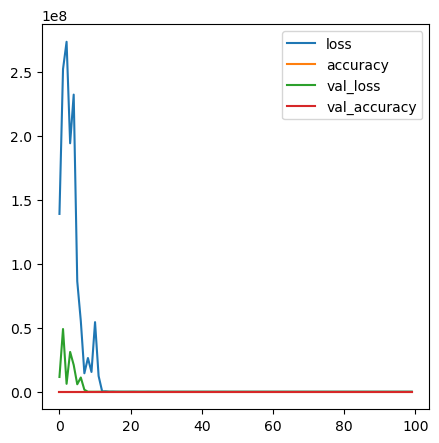

In [9]:
plotValidate(model_history)

### Random Forest Classifier

In [10]:
forest = ek.RandomForestClassifier(n_estimators=100, oob_score=True,)
forest.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [11]:
score = forest.score(X_test,y_test)
print("Random Forest Accuracy:", score)

Random Forest Accuracy: 0.9952191235059761


In [12]:
predicted = forest.predict(X)
matrix = confusion_matrix(y, predicted)
false_positive = (matrix[0][1] / float(sum(matrix[0])))*100
false_negative = (matrix[1][0] / float(sum(matrix[1])))*100
print("False positive rate: " + str(false_positive) + "%")
print("False negative rate: " + str(false_negative) + "%")

False positive rate: 0.11579339150572764%
False negative rate: 0.21537642475134913%


<AxesSubplot:>

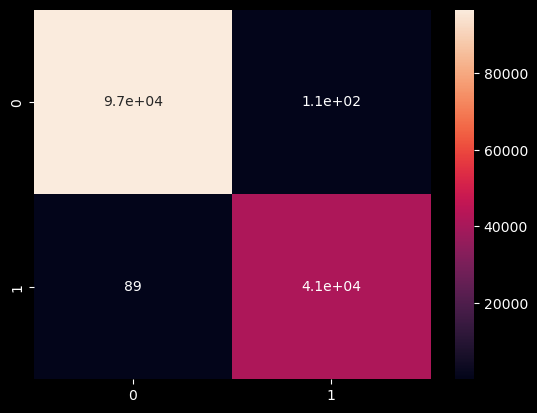

In [19]:
import seaborn as sns
sns.heatmap(matrix, annot=True)

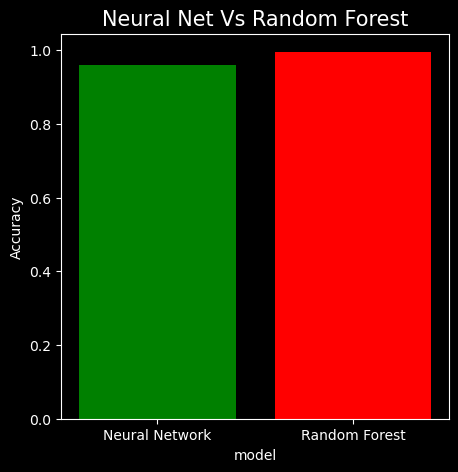

In [22]:
a = 0.9613425135612488
b = 0.9952191235059761

data2 = {'Neural Network':a,'Random Forest':b}
column = list(data2.keys())
rows = list(data2.values())

plt.style.use('dark_background')
fig = plt.figure(figsize = (5,5))
plt.bar(column,rows, color=['green', 'red'])
 
plt.xlabel("model",fontsize=10)
plt.ylabel("Accuracy",fontsize=10)
plt.title("Neural Net Vs Random Forest",fontsize=15)
plt.show()

### Test File

In [13]:
import pefile
import os
import array
import math
import pickle
import joblib
import sys
import argparse

In [14]:
def getent(data):
    if len(data) == 0:
        return 0.0
    freq = array.array('L', [0] * 256)
    for x in data:
        freq[x if isinstance(x, int) else ord(x)] += 1

    entropy = 0
    for x in freq:
        if x:
            p_x = float(x) / len(data)
            entropy -= p_x * math.log(p_x, 2)

    return entropy
p11='DIRECTORY_ENTRY_RESOURCE'
p12='directory'

def getres(pe):
    resources = []
    if hasattr(pe, p11):
        try:
            for resource_type in pe.DIRECTORY_ENTRY_RESOURCE.entries:
                if hasattr(resource_type, p12):
                    for resource_id in resource_type.directory.entries:
                        if hasattr(resource_id, p12):
                            for resource_lang in resource_id.directory.entries:
                                data = pe.get_data(resource_lang.data.struct.OffsetToData, resource_lang.data.struct.Size)
                                size = resource_lang.data.struct.Size
                                entropy = getent(data)

                                resources.append([entropy, size])
        except Exception as e:
            return resources
    return resources

p1='StringFileInfo'
p2='VarFileInfo'
p3='VS_FIXEDFILEINFO'
p4='flags'
p5='os'
p6='type'
p7='file_version'
p8='product_version'
p9='signature'
p10='struct_version'
def getver_details(pe):
    extracted_feature = {}
    for fileinfo in pe.FileInfo:
        if fileinfo.Key == p1:
            for st in fileinfo.StringTable:
                for entry in st.entries.items():
                    extracted_feature[entry[0]] = entry[1]
        if fileinfo.Key == p2:
            for var in fileinfo.Var:
                extracted_feature[var.entry.items()[0][0]] = var.entry.items()[0][1]
    if hasattr(pe,p3):
        extracted_feature[p4] = pe.VS_FIXEDFILEINFO.FileFlags
        extracted_feature[p5] = pe.VS_FIXEDFILEINFO.FileOS
        extracted_feature[p6] = pe.VS_FIXEDFILEINFO.FileType
        extracted_feature[p7] = pe.VS_FIXEDFILEINFO.FileVersionLS
        extracted_feature[p8] = pe.VS_FIXEDFILEINFO.ProductVersionLS
        extracted_feature[p9] = pe.VS_FIXEDFILEINFO.Signature
        extracted_feature[p10] = pe.VS_FIXEDFILEINFO.StrucVersion
    return extracted_feature

In [16]:
features=list(data.columns)

In [17]:
mypath = "main.exe"

extracted_feature = {}
pe = pefile.PE(mypath)
extracted_feature[features[2]] = pe.FILE_HEADER.Machine
extracted_feature[features[3]] = pe.FILE_HEADER.SizeOfOptionalHeader
extracted_feature[features[4]] = pe.FILE_HEADER.Characteristics
extracted_feature[features[5]] = pe.OPTIONAL_HEADER.MajorLinkerVersion
extracted_feature[features[6]] = pe.OPTIONAL_HEADER.MinorLinkerVersion
extracted_feature[features[7]] = pe.OPTIONAL_HEADER.SizeOfCode
extracted_feature[features[8]] = pe.OPTIONAL_HEADER.SizeOfInitializedData
extracted_feature[features[9]] = pe.OPTIONAL_HEADER.SizeOfUninitializedData
extracted_feature[features[10]] = pe.OPTIONAL_HEADER.AddressOfEntryPoint
extracted_feature[features[11]] = pe.OPTIONAL_HEADER.BaseOfCode
try:
    extracted_feature[features[12]] = pe.OPTIONAL_HEADER.BaseOfData
except AttributeError:
    extracted_feature[features[12]] = 0
extracted_feature[features[13]] = pe.OPTIONAL_HEADER.ImageBase
extracted_feature[features[14]] = pe.OPTIONAL_HEADER.SectionAlignment
extracted_feature[features[15]] = pe.OPTIONAL_HEADER.FileAlignment
extracted_feature[features[16]] = pe.OPTIONAL_HEADER.MajorOperatingSystemVersion
extracted_feature[features[17]] = pe.OPTIONAL_HEADER.MinorOperatingSystemVersion
extracted_feature[features[18]] = pe.OPTIONAL_HEADER.MajorImageVersion
extracted_feature[features[19]] = pe.OPTIONAL_HEADER.MinorImageVersion
extracted_feature[features[20]] = pe.OPTIONAL_HEADER.MajorSubsystemVersion
extracted_feature[features[21]] = pe.OPTIONAL_HEADER.MinorSubsystemVersion
extracted_feature[features[22]] = pe.OPTIONAL_HEADER.SizeOfImage
extracted_feature[features[23]] = pe.OPTIONAL_HEADER.SizeOfHeaders
extracted_feature[features[24]] = pe.OPTIONAL_HEADER.CheckSum
extracted_feature[features[25]] = pe.OPTIONAL_HEADER.Subsystem
extracted_feature[features[26]] = pe.OPTIONAL_HEADER.DllCharacteristics
extracted_feature[features[27]] = pe.OPTIONAL_HEADER.SizeOfStackReserve
extracted_feature[features[28]] = pe.OPTIONAL_HEADER.SizeOfStackCommit
extracted_feature[features[29]] = pe.OPTIONAL_HEADER.SizeOfHeapReserve
extracted_feature[features[30]] = pe.OPTIONAL_HEADER.SizeOfHeapCommit
extracted_feature[features[31]] = pe.OPTIONAL_HEADER.LoaderFlags
extracted_feature[features[32]] = pe.OPTIONAL_HEADER.NumberOfRvaAndSizes
extracted_feature[features[33]] = len(pe.sections)
entropy = list(map(lambda x: x.get_entropy(), pe.sections))
extracted_feature[features[34]] = sum(entropy) / float(len(entropy))
extracted_feature[features[35]] = min(entropy)
extracted_feature[features[36]] = max(entropy)
raw_sizes = list(map(lambda x: x.SizeOfRawData, pe.sections))
extracted_feature[features[37]] = sum(raw_sizes) / float(len(raw_sizes))
extracted_feature[features[38]] = min(raw_sizes)
extracted_feature[features[39]] = max(raw_sizes)
virtual_sizes = list(map(lambda x: x.Misc_VirtualSize, pe.sections))
extracted_feature[features[40]] = sum(virtual_sizes) / float(len(virtual_sizes))
extracted_feature[features[41]] = min(virtual_sizes)
extracted_feature[features[42]] = max(virtual_sizes)
try:
    extracted_feature[features[43]] = len(pe.DIRECTORY_ENTRY_IMPORT)
    imports = sum([x.imports for x in pe.DIRECTORY_ENTRY_IMPORT], [])
    extracted_feature[features[44]] = len(imports)
    extracted_feature[features[45]] = len(list(filter(lambda x: x.name is None, imports)))
except AttributeError:
    extracted_feature[features[43]] = 0
    extracted_feature[features[44]] = 0
    extracted_feature[features[45]] = 0
try:
    extracted_feature[features[46]] = len(pe.DIRECTORY_ENTRY_EXPORT.symbols)
except AttributeError:
    extracted_feature[features[46]] = 0
resources = getres(pe)
extracted_feature[features[47]] = len(resources)
if len(resources) > 0:
    entropy = list(map(lambda x: x[0], resources))
    extracted_feature[features[48]] = sum(entropy) / float(len(entropy))
    extracted_feature[features[49]] = min(entropy)
    extracted_feature[features[50]] = max(entropy)
    sizes = list(map(lambda x: x[1], resources))
    extracted_feature[features[51]] = sum(sizes) / float(len(sizes))
    extracted_feature[features[52]] = min(sizes)
    extracted_feature[features[53]] = max(sizes)
else:
    extracted_feature[features[48]] = 0
    extracted_feature[features[49]] = 0
    extracted_feature[features[50]] = 0
    extracted_feature[features[51]] = 0
    extracted_feature[features[52]] = 0
    extracted_feature[features[53]] = 0
    extracted_feature[features[54]] = 0
try:
    extracted_feature[features[54]] = pe.DIRECTORY_ENTRY_LOAD_CONFIG.struct.Size
except AttributeError:
    extracted_feature[features[54]] = 0
try:
    version_infos = getver_details(pe)
    extracted_feature[features[55]] = len(version_infos.keys())
except AttributeError:
    extracted_feature[features[55]] = 0


pe_features = list(extracted_feature[x] for x in extracted_feature.keys())
ext = forest.predict([pe_features])[0]
print('The file is %s' % (['legitimate','malicious'][ext]))

The file is malicious
